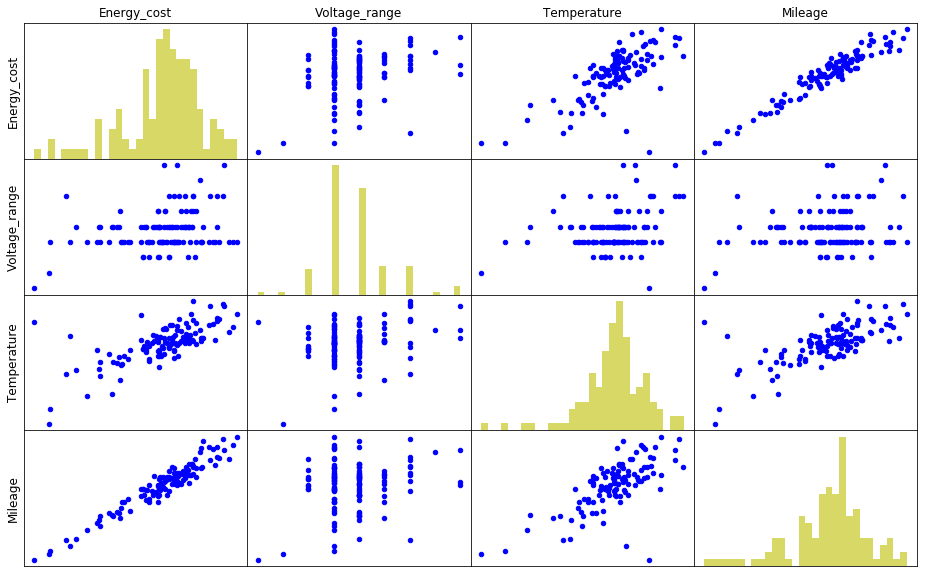

In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os,xlrd

def correlation_analysis(datalist,labels):                              
    n=len(labels)
    fig,axes=plt.subplots(n,n,sharex=False,sharey=False)
    fig.set_size_inches(16,10)
    plt.subplots_adjust(wspace=0,hspace=0)
    for i in range(n):
        for j in range(n):
            axes[i,j].set_xticks([])
            axes[i,j].set_yticks([])
            if i==0:
                axes[i,j].set_title(labels[j],fontsize='large')
            if j==0:
                axes[i,j].set_ylabel(labels[i],fontsize='large')
            if i==j:
                axes[i,i].hist(datalist[i],30,color='y',alpha=0.6)
            else:
                axes[i,j].scatter(datalist[j],datalist[i],marker='o',s=20,color='b',alpha=1)

def readata(path,sheet,col,chop,str=0):   
    dt=[]
    data=xlrd.open_workbook(path)
    table=data.sheet_by_index(sheet)
    value=table.col_values(col)
    value.pop(0)
    for val in value:
        if str == 1:
            dt.append(val)
        elif chop==0:
            dt.append(float(val.encode('utf-8')))
        else:
            dt.append(float(val[:-chop].encode('utf-8')))
    return dt

def readlist(path,sheet,col):   #读组电压  参数为 路径 表格 数列
    
    data=xlrd.open_workbook(path)
    table=data.sheet_by_index(sheet)
    value=table.col_values(col)
    value.pop(0)
    dataframe=[]
    for i in value:
        dt=[]
        for j in i.split(';'):
            dt.append(int(j))
        dataframe.append(dt)
    return dataframe

def badpop(lt):              #去坏值
    i=0
    p=[]
    pop=[]
    mean=np.mean(lt)
    std=np.std(lt)
    for x in lt:
        if abs(mean-x)>std*10:
            p.append(i)
        i+=1
    for i in range(len(p)):
        pop.append(p[i]-i)
    return pop

def zeropop(lt):              
    i=0
    p=[]
    pop=[]
    for x in lt:
        if x==0:
            p.append(i)
        i+=1
    for i in range(len(p)):
        pop.append(p[i]-i)
    return pop

def getpath(dir):
    path=[]
    for file in os.listdir(dir):
        if file[:7]=='vehicle':
            path.append(os.path.join(dir,file))
    return path

path=getpath(u'G:\\毕业设计\\20150402')

allcost=[]
for file in path:
    energy=readata(file,0,19,4)
    zero=zeropop(energy)
    for i in range(len(zero)):
        energy.pop(zero[i])

    encost=0
    for i in range(len(energy)-1):
        if energy[i]>energy[i+1]:
            encost+=(energy[i]-energy[i+1])
    allcost.append(encost)
    
alltmp=[]
for file in path:
    tmp=readata(file,0,12,2)
    alltmp.append(sum(tmp)/len(tmp))
    
allrange=[]
for file in path:
    vt=readlist(file,4,3)
    rg=[]
    for v in vt:
        rg.append(max(v)-min(v))
    allrange.append(max(rg))

allmile=[]
for file in path:
    mile=readata(file,1,4,2)
    zero=zeropop(mile)
    for i in range(len(zero)):
        mile.pop(zero[i])  
    cum=0
    for i in range(len(mile)-1):
        if mile[i]<mile[i+1]:
            cum+=(mile[i+1]-mile[i])
    allmile.append(cum)

datalist=[allcost,allrange,alltmp,allmile]
labels=['Energy_cost','Voltage_range','Temperature','Mileage']

for i in range(4):               #去坏值
    bad=badpop(datalist[i])
    for j in range(len(bad)):
        datalist[0].pop(bad[j]) 
        datalist[1].pop(bad[j]) 
        datalist[2].pop(bad[j]) 
        datalist[3].pop(bad[j]) 
correlation_analysis(datalist,labels)   